1)import csv sul covid

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as math
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url, low_memory=False)

2)Si richiede di verificare le dimensioni del dataset e i relativi metadati;
per svolgere questa parte applico i passaggi che abbiamo visto per una EDA

In [5]:
df #view totale del dataframe

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
409730      ZWE    Africa     Zimbabwe  2024-06-12     266365.0        0.0   
409731      ZWE    Africa     Zimbabwe  2024-06-13     266365.0        0.0   
409732      ZWE    Africa     Zimbabwe  2024-06-14     266365.0        0.0   
409733      ZWE    Africa     Zimbabwe  2024-06-15     266365.0        0.0   
409734      ZWE    Africa     Zimbabwe  2024-06-16     266365.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
409730                 0.0        5740.0         0.0                  0.0   
409731                 0.0        5740.0         0.0                  0.0   
409732                 0.0        5740.0         0.0                  0.0   
409733                 0.0        5740.0         0.0                  0.0   
409734                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
409730  ...          30.7                  36.791                         1.7   
409731  ...          30.7                  36.791                         1.7   
409732  ...          30.7                  36.791                         1.7   
409733  ...          30.7                  36.791                         1.7   
409734  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
409730            61.49                    0.571  16320539.0   
409731            61.49                    0.571  16320539.0   
409732            61.49                    0.571  16320539.0   
409733            61.49                    0.571  16320539.0   
409734            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

2.1)prima overview dei dati: 
avrei potuto applicare anche df.head ma ho preferito usare df.sample per avere dati provenienti da tutta il dataframe e non solo quelli iniziali. 

In [7]:
df.sample(5) #ci restituisce 5 righe a caso

iso_code      continent    location        date  total_cases  \
207852  OWID_LIC            NaN  Low income  2024-04-21    2330644.0   
409313       ZWE         Africa    Zimbabwe  2023-04-22     264610.0   
274218  OWID_OCE            NaN     Oceania  2024-06-26          NaN   
231198       MEX  North America      Mexico  2023-08-28    7675566.0   
281126       PAN  North America      Panama  2021-02-11     325487.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
207852      214.0              30.571       48059.0         1.0   
409313        0.0               4.000        5684.0         0.0   
274218        NaN                 NaN           NaN         NaN   
231198        0.0            1123.143      334660.0         0.0   
281126        0.0            1033.429        5426.0         0.0   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
207852                0.143  ...           NaN                     NaN   
409313                0.000  ...          30.7                  36.791   
274218                  NaN  ...           NaN                     NaN   
231198                7.143  ...          21.4                  87.847   
281126               29.286  ...           9.9                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
207852                         NaN              NaN                      NaN   
409313                        1.70            61.49                    0.571   
274218                         NaN              NaN                      NaN   
231198                        1.38            75.05                    0.779   
281126                        2.30            78.51                    0.815   

         population  excess_mortality_cumulative_absolute  \
207852  737604900.0                                   NaN   
409313   16320539.0                                   NaN   
274218   45038860.0                                   NaN   
231198  127504120.0                                   NaN   
281126    4408582.0                                   NaN   

        excess_mortality_cumulative  excess_mortality  \
207852                          NaN               NaN   
409313                          NaN               NaN   
274218                          NaN               NaN   
231198                          NaN               NaN   
281126                          NaN               NaN   

        excess_mortality_cumulative_per_million  
207852                                      NaN  
409313                                      NaN  
274218                                      NaN  
231198                                      NaN  
281126                                      NaN  

[5 rows x 67 columns]

2.2)Visualizzazione delle informazioni generali sul dataset

In [9]:
df.shape #ci restituisce quante riche e colonne ci sono nel dataframe

(409735, 67)

In [10]:
df.size #ci restituisce quanti elementi sono presenti nel df

27452245

In [11]:
df.dtypes #ci dice quali datatypes ci sono per ogni colonna 

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [12]:
df.info() #ci restituisce info sul df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409735 entries, 0 to 409734
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409735 non-null  object 
 1   continent                                   390087 non-null  object 
 2   location                                    409735 non-null  object 
 3   date                                        409735 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths_smoothed                         397471 non-null  float64
 

2.3)procediamo con l'analisi delle colonne numeriche 

In [14]:
df.index # ci restuisce il range dell'indice creato automaticamente e come questo procede

RangeIndex(start=0, stop=409735, step=1)

In [15]:
df['date'] = pd.to_datetime(df['date']) #ho cambiato il datatype della colonna date per semplificarmi raggruppamenti futuri
print('La colonna date è:', df['date'].dtype)

La colonna date è: datetime64[ns]


In [16]:
pd.set_option('display.float_format', str)#per formattare iil valore float 
df.describe() #ci restituisce i descrittori statistici associati alle colonne numeriche

date       total_cases          new_cases  \
count                         409735          370544.0           398301.0   
mean   2022-03-25 23:10:11.578703360 7751026.105126517  8253.286398979666   
min              2020-01-01 00:00:00               1.0                0.0   
25%              2021-02-15 00:00:00           10084.0                0.0   
50%              2022-03-25 00:00:00           83637.0                0.0   
75%              2023-05-03 00:00:00          951938.0                0.0   
max              2024-07-03 00:00:00       775643495.0         44236227.0   
std                              NaN 45602896.72043337 232993.48542523652   

       new_cases_smoothed       total_deaths         new_deaths  \
count            397071.0           347781.0           398701.0   
mean    8278.596856212114  92068.21328077152  73.93877617563037   
min                   0.0                1.0                0.0   
25%                   0.0              138.0                0.0   
50%                13.571             1425.0                0.0   
75%               342.143            13166.0                0.0   
max             6319461.0          7051600.0           103719.0   
std     87865.72728151022 465430.63773623854 1384.6088586161766   

       new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
count             397471.0                 370544.0               398301.0   
mean     74.16503565291555       117917.48908094586     125.66754588113001   
min                    0.0                      0.0                    0.0   
25%                    0.0                 3152.865                    0.0   
50%                    0.0               35963.1325                    0.0   
75%                  3.429               163380.991                    0.0   
max                14817.0                771480.58             240325.866   
std      519.6227503515806       164308.16070110752     1502.7832753115022   

       new_cases_smoothed_per_million  ...       male_smokers  \
count                        397071.0  ...           235806.0   
mean               126.04991451906582  ...  32.91064760862743   
min                               0.0  ...                7.7   
25%                               0.0  ...               22.6   
50%                             3.225  ...               33.1   
75%                            60.275  ...               41.3   
max                         34332.267  ...               78.1   
std                 556.7727024372152  ... 13.572883407541765   

       handwashing_facilities  hospital_beds_per_thousand   life_expectancy  \
count                156055.0                    281306.0          377679.0   
mean        50.79038269199961          3.0972505101206513 73.70839337109027   
min                     1.188                         0.1             53.28   
25%                    20.859                         1.3             69.59   
50%                    49.839                         2.5             75.05   
75%                    82.502                         4.2             79.46   
max                     100.0                        13.8             86.75   
std          31.9529627691318           2.548192317631473 7.394595028336769   

       human_development_index         population  \
count                 308910.0           409735.0   
mean        0.7225416917548801 129370156.16859677   
min                      0.394               47.0   
25%                      0.602           449002.0   
50%                       0.74          5882259.0   
75%                      0.829         28301700.0   
max                      0.957       7975105024.0   
std          0.148993199461984  663667232.9364998   

       excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
count                               13315.0                      13315.0   
mean                     55816.766692101846            9.756542245587685   
min                        

2.4)analisi delle colonne categoriche

In [18]:
df.columns #ci dice le intestazioni delle colonne 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [19]:
for column in df.columns: #ho fatto questo ciclo for per vedere quali colonne fossero categoriche 
    if df[column].dtype == 'object':
        print(column, 'datatype categorico')
        

iso_code datatype categorico
continent datatype categorico
location datatype categorico
tests_units datatype categorico


In [20]:
for column in df.columns: #qui ciclo for per vedere quanti valori unici sono presenti nelle colonne categoriche
    if df[column].dtype == 'object':
        unique_count = df[column].nunique()
        print (column,'contiene', unique_count, 'valori unici')

iso_code contiene 255 valori unici
continent contiene 6 valori unici
location contiene 255 valori unici
tests_units contiene 4 valori unici


In [21]:
for column in df.columns: #ciclo for per vedere con che frequenza si presentano i valori categorici
    if df[column].dtype == 'object':
        freq_unici= df[column].value_counts()
        print ('la frequenza dei valori unici sono')
        print (freq_unici)

la frequenza dei valori unici sono
iso_code
MYS         1642
OWID_ASI    1642
OWID_EUR    1642
CZE         1642
OWID_HIC    1642
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64
la frequenza dei valori unici sono
continent
Africa           92626
Europe           88185
Asia             80864
North America    66644
Oceania          39014
South America    22754
Name: count, dtype: int64
la frequenza dei valori unici sono
location
Malaysia           1642
Asia               1642
Europe             1642
Czechia            1642
High income        1642
                   ... 
Scotland           1305
Wales              1198
Macao               795
Northern Cyprus     691
Western Sahara        1
Name: count, Length: 255, dtype: int64
la frequenza dei valori unici sono
tests_units
tests performed    80099
people tested      16257
samples tested      9591
units unclear        841
Name: count, dtype: int64


2.5)individuazione dei dati nulli

In [23]:
for column in df.columns: # ciclo for per vedere quanti valori nulli e la percentuale presenti in tutte le colonne 
    nancount = df[column].isna().sum()
    nanperc = round (( nancount/df.shape[0])*100/2)
    print (column,'-', nancount,'valori nulli','-', nanperc, '% valori nulli')

iso_code - 0 valori nulli - 0 % valori nulli
continent - 19648 valori nulli - 2 % valori nulli
location - 0 valori nulli - 0 % valori nulli
date - 0 valori nulli - 0 % valori nulli
total_cases - 39191 valori nulli - 5 % valori nulli
new_cases - 11434 valori nulli - 1 % valori nulli
new_cases_smoothed - 12664 valori nulli - 2 % valori nulli
total_deaths - 61954 valori nulli - 8 % valori nulli
new_deaths - 11034 valori nulli - 1 % valori nulli
new_deaths_smoothed - 12264 valori nulli - 1 % valori nulli
total_cases_per_million - 39191 valori nulli - 5 % valori nulli
new_cases_per_million - 11434 valori nulli - 1 % valori nulli
new_cases_smoothed_per_million - 12664 valori nulli - 2 % valori nulli
total_deaths_per_million - 61954 valori nulli - 8 % valori nulli
new_deaths_per_million - 11034 valori nulli - 1 % valori nulli
new_deaths_smoothed_per_million - 12264 valori nulli - 1 % valori nulli
reproduction_rate - 224918 valori nulli - 27 % valori nulli
icu_patients - 370743 valori nulli - 

Abbiamo concluso l'EDA.

3)Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;
si sceglie di adottare la colonna new_cases e non la colonna total_cases, perche quest'ultima riporta i dati in modo non corretto

In [26]:
pd.set_option('display.float_format', str)
totalipercontinente = df.dropna(subset=['continent']) #qui abbiamo eliminato i dati nulli
totalipercontinente2= totalipercontinente.groupby('continent')['new_cases'].sum() 
totalipercontinente2

continent
Africa           13144264.0
Asia            301515124.0
Europe          252672573.0
North America   124572945.0
Oceania          14973467.0
South America    68832646.0
Name: new_cases, dtype: float64

Commento: i dati sembrano essere coerenti da quanto possiamo vedere sul sito[https://coronavirus.gimbe.org/epidemia-coronavirus-europa.it-IT.html]

4)Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, 
ne confronti i seguenti relativi descrittori statistici:
valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo 
(calcolati anche sulle locazioni senza indicazione di continente);

In [28]:
totalicasi_globali= totalipercontinente['new_cases'].sum() #calcoliamo il totale globale
totalicasi_globali

775711019.0

In [29]:
continente1='Africa'
continente2='Europe'

group1= df.groupby('continent') #raggruppamento per continente Africa
group1.get_group(continente1)
group1=group1.get_group(continente1)
group1

iso_code continent  location       date  total_cases  new_cases  \
4875        DZA    Africa   Algeria 2020-01-05          NaN        0.0   
4876        DZA    Africa   Algeria 2020-01-06          NaN        0.0   
4877        DZA    Africa   Algeria 2020-01-07          NaN        0.0   
4878        DZA    Africa   Algeria 2020-01-08          NaN        0.0   
4879        DZA    Africa   Algeria 2020-01-09          NaN        0.0   
...         ...       ...       ...        ...          ...        ...   
409730      ZWE    Africa  Zimbabwe 2024-06-12     266365.0        0.0   
409731      ZWE    Africa  Zimbabwe 2024-06-13     266365.0        0.0   
409732      ZWE    Africa  Zimbabwe 2024-06-14     266365.0        0.0   
409733      ZWE    Africa  Zimbabwe 2024-06-15     266365.0        0.0   
409734      ZWE    Africa  Zimbabwe 2024-06-16     266365.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
4875                   NaN           NaN         0.0                  NaN   
4876                   NaN           NaN         0.0                  NaN   
4877                   NaN           NaN         0.0                  NaN   
4878                   NaN           NaN         0.0                  NaN   
4879                   NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
409730                 0.0        5740.0         0.0                  0.0   
409731                 0.0        5740.0         0.0                  0.0   
409732                 0.0        5740.0         0.0                  0.0   
409733                 0.0        5740.0         0.0                  0.0   
409734                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
4875    ...          30.4                  83.741                         1.9   
4876    ...          30.4                  83.741                         1.9   
4877    ...          30.4                  83.741                         1.9   
4878    ...          30.4                  83.741                         1.9   
4879    ...          30.4                  83.741                         1.9   
...     ...           ...                     ...                         ...   
409730  ...          30.7                  36.791                         1.7   
409731  ...          30.7                  36.791                         1.7   
409732  ...          30.7                  36.791                         1.7   
409733  ...          30.7                  36.791                         1.7   
409734  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
4875              76.88                    0.748  44903228.0   
4876              76.88                    0.748  44903228.0   
4877              76.88                    0.748  44903228.0   
4878              76.88                    0.748  44903228.0   
4879              76.88                    0.748  44903228.0   
...                 ...                      ...         ...   
409730            61.49                    0.571  16320539.0   
409731            61.49                    0.571  16320539.0   
409732            61.49                    0.571  16320539.0   
409733            61.49                    0.571  16320539.0   
409734            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
4875                                     NaN                          NaN   
4876                                     NaN                          NaN   
4877                                     NaN                          NaN   
4878                                     NaN                          NaN   
4879                                     NaN                      

In [30]:
group2= df.groupby('continent') #stessa cosa fatta prima con continente europa
group2.get_group(continente2)
group2=group2.get_group(continente2)
group2

In [31]:
group2

iso_code continent location       date  total_cases  new_cases  \
3250         ALB    Europe  Albania 2020-01-05          NaN        0.0   
3251         ALB    Europe  Albania 2020-01-06          NaN        0.0   
3252         ALB    Europe  Albania 2020-01-07          NaN        0.0   
3253         ALB    Europe  Albania 2020-01-08          NaN        0.0   
3254         ALB    Europe  Albania 2020-01-09          NaN        0.0   
...          ...       ...      ...        ...          ...        ...   
401587  OWID_WLS    Europe    Wales 2023-07-08          NaN        NaN   
401588  OWID_WLS    Europe    Wales 2023-07-09          NaN        NaN   
401589  OWID_WLS    Europe    Wales 2023-07-10          NaN        NaN   
401590  OWID_WLS    Europe    Wales 2023-07-11          NaN        NaN   
401591  OWID_WLS    Europe    Wales 2023-07-12          NaN        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
3250                   NaN           NaN         0.0                  NaN   
3251                   NaN           NaN         0.0                  NaN   
3252                   NaN           NaN         0.0                  NaN   
3253                   NaN           NaN         0.0                  NaN   
3254                   NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
401587                 NaN           NaN         NaN                  NaN   
401588                 NaN           NaN         NaN                  NaN   
401589                 NaN           NaN         NaN                  NaN   
401590                 NaN           NaN         NaN                  NaN   
401591                 NaN           NaN         NaN                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
3250    ...          51.2                     NaN                        2.89   
3251    ...          51.2                     NaN                        2.89   
3252    ...          51.2                     NaN                        2.89   
3253    ...          51.2                     NaN                        2.89   
3254    ...          51.2                     NaN                        2.89   
...     ...           ...                     ...                         ...   
401587  ...           NaN                     NaN                         NaN   
401588  ...           NaN                     NaN                         NaN   
401589  ...           NaN                     NaN                         NaN   
401590  ...           NaN                     NaN                         NaN   
401591  ...           NaN                     NaN                         NaN   

        life_expectancy  human_development_index  population  \
3250              78.57                    0.795   2842318.0   
3251              78.57                    0.795   2842318.0   
3252              78.57                    0.795   2842318.0   
3253              78.57                    0.795   2842318.0   
3254              78.57                    0.795   2842318.0   
...                 ...                      ...         ...   
401587              NaN                      NaN   3170000.0   
401588              NaN                      NaN   3170000.0   
401589              NaN                      NaN   3170000.0   
401590              NaN                      NaN   3170000.0   
401591              NaN                      NaN   3170000.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
3250                                     NaN                          NaN   
3251                                     NaN                          NaN   
3252                                     NaN                          NaN   
3253                                     NaN                          NaN   
3254                                     NaN                       

In [32]:
group1.groupby('continent')['new_cases'].agg(['max','mean']) #qui calcoliamo max e media per africa
group1=group1.groupby('continent')['new_cases'].agg(['max','mean'])

In [33]:
pd.set_option('display.float_format', str)
group1

max              mean
continent                           
Africa    162987.0 141.9191085966011

In [34]:
group2.groupby('continent')['new_cases'].agg(['max','mean']) #stessa cosa di prima con l'europa
group2=group2.groupby('continent')['new_cases'].agg(['max','mean'])

In [35]:
pd.set_option('display.float_format', str)
group2

max               mean
continent                             
Europe    2417043.0 3087.4724822209732

In [36]:
pd.concat([group1,group2]) #concateno i due gruppi
Group=pd.concat([group1,group2])
print (Group)

                max               mean
continent                             
Africa     162987.0  141.9191085966011
Europe    2417043.0 3087.4724822209732


In [37]:
totalicasiafrica = 13144264.0 # calcolo % africa sul totale globale 
perc_africa= (totalicasiafrica/totalicasi_globali)*100
print(perc_africa, '%dei casi africani sul totale globale')

1.694479474707578 %dei casi africani sul totale globale


In [38]:
totalicasieuropa = 252672573.0 #calcolo % europa sul totale globale
perc_europa= (totalicasieuropa/totalicasi_globali)*100
print(perc_europa, '%dei casi europei sul totale globale')

32.573028719603634 %dei casi europei sul totale globale


5)Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

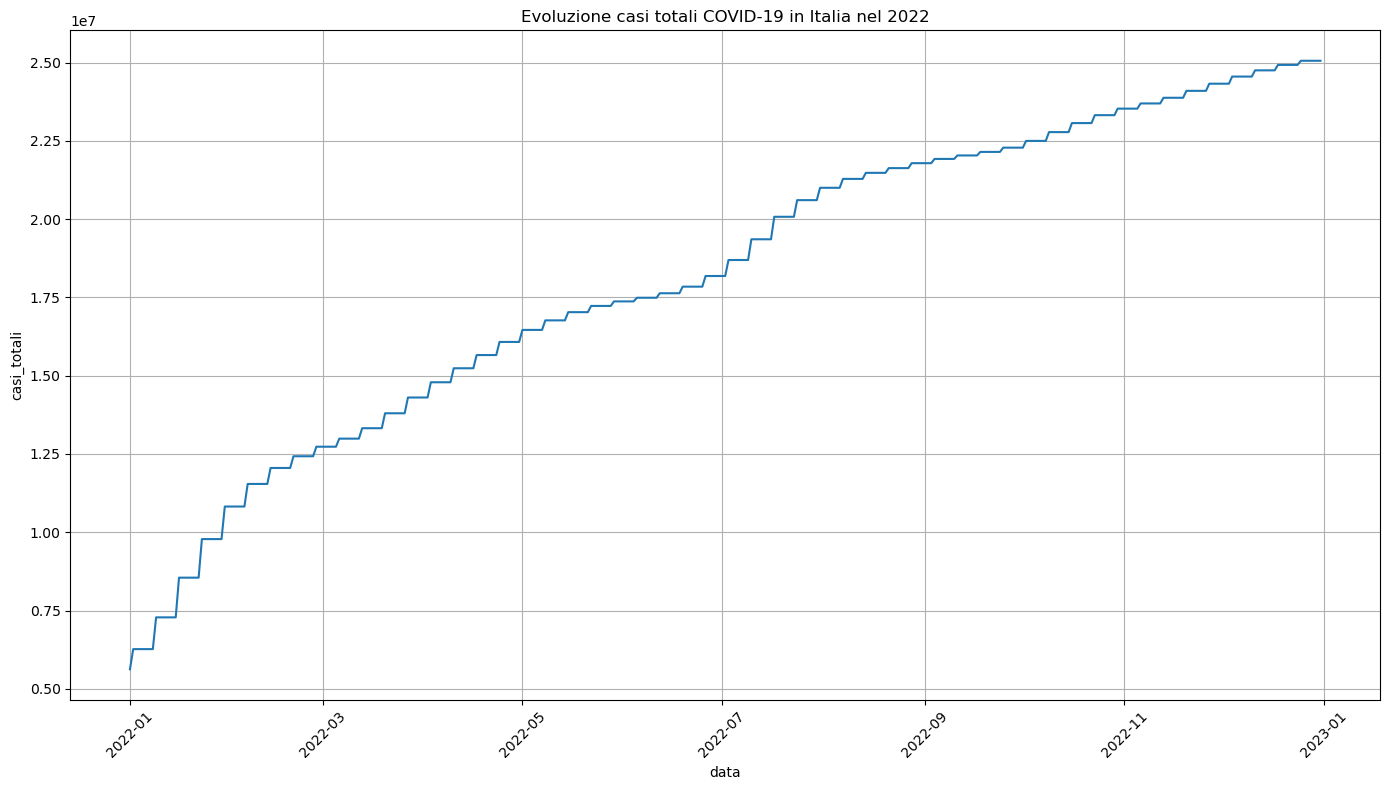

In [40]:
# creo variabile per filtrare i dati come da richiesta
italia_2022 = totalipercontinente[(totalipercontinente['location'] == 'Italy') & (totalipercontinente['date'].dt.year ==2022)]

#creazione del grafico
math.figure(figsize=(14, 8))
math.plot(italia_2022['date'], italia_2022['total_cases'])
math.title('Evoluzione casi totali COVID-19 in Italia nel 2022')
math.xlabel('data')
math.ylabel('casi_totali')
math.grid(True)
math.xticks(rotation=45)
math.tight_layout()
math.show()

5.1)Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).

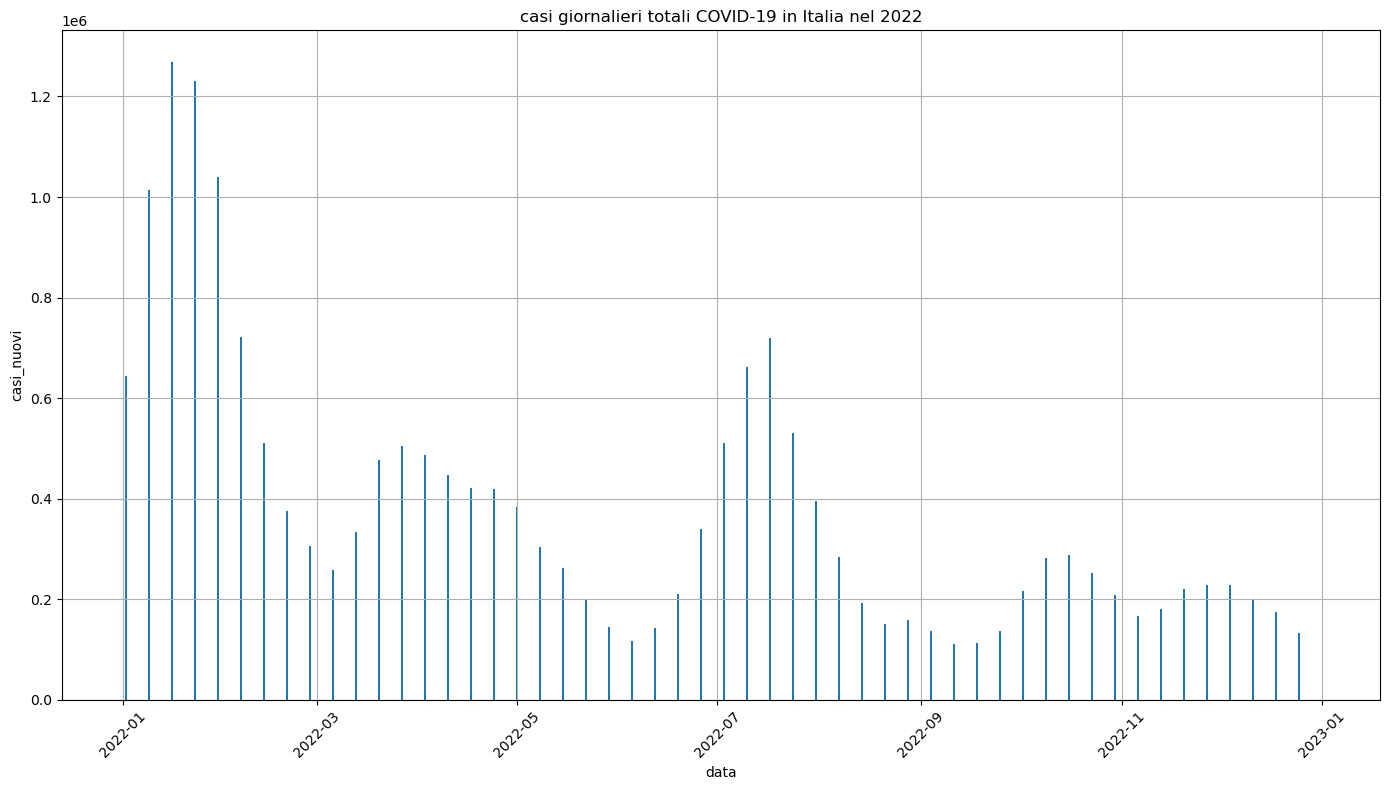

In [41]:
#stesso procedimento di prima cambia solo che viene filtrata per new_cases e non per total_cases
math.figure(figsize=(14, 8))
math.bar(italia_2022['date'], italia_2022['new_cases'])
math.title('casi giornalieri totali COVID-19 in Italia nel 2022')
math.xlabel('data')
math.ylabel('casi_nuovi')
math.grid(True)
math.xticks(rotation=45)
math.tight_layout()
math.show()

5.2)Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

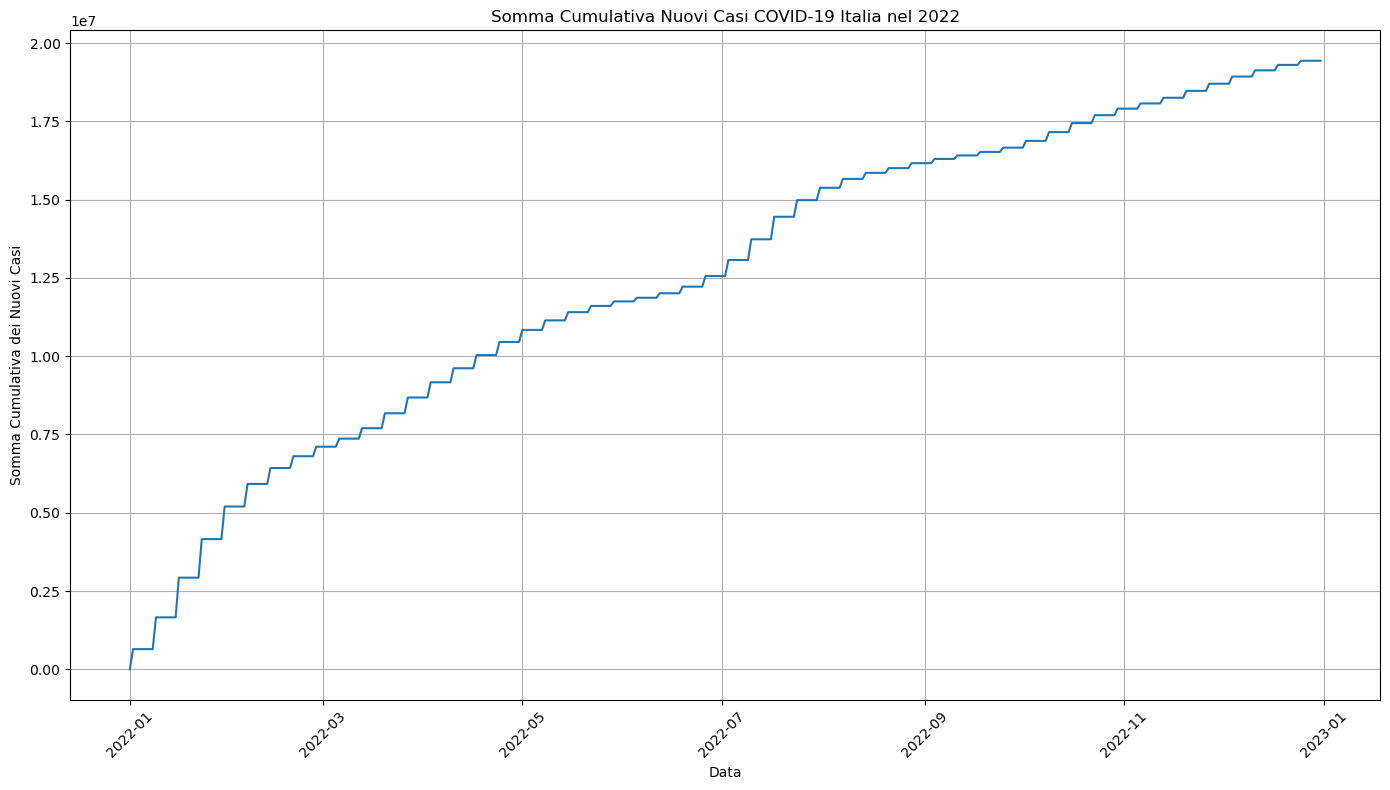

In [88]:
#sommiamo i nuovi casi raggruppati precedentemente per continente
totalicasi_globali= italia_2022['new_cases'].sum()

#filtriamo 
italia_2022.loc[:,'nuovicasi_cumulativa'] = italia_2022['new_cases'].cumsum()

#creazione del grafico
math.figure(figsize=(14, 8))
math.plot(italia_2022['date'], italia_2022['nuovicasi_cumulativa'])
math.title('Somma Cumulativa Nuovi Casi COVID-19 Italia nel 2022')
math.xlabel('Data')
math.ylabel('Somma Cumulativa dei Nuovi Casi')
math.grid(True)
math.xticks(rotation=45)
math.tight_layout()
math.show()

Commento: i due grafici ottenuti sono uguali perche' total cases riporta i dati giornalieri cumulativi

6)Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo

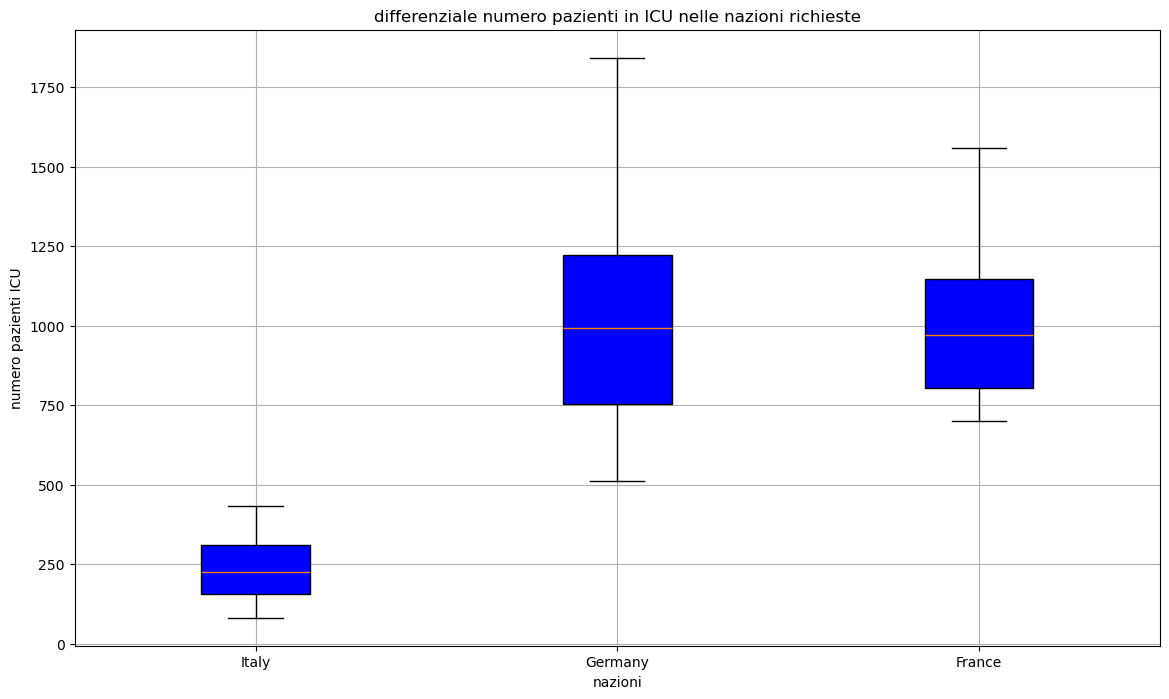

In [44]:
# creo lista nazioni e filtro 
nazioni= ['Italy', 'Germany', 'France']
filtro_nazionidata= totalipercontinente[(totalipercontinente['location'].isin(nazioni)) & (totalipercontinente['date'].between('2022-05-01', '2023-04-30'))]

#creazione del grafico boxplot
math.figure(figsize=(14, 8))
math.boxplot([filtro_nazionidata[filtro_nazionidata['location'] == nazione]['icu_patients'].dropna() for nazione in nazioni],labels=nazioni, patch_artist=True, boxprops={'facecolor':'blue'})
math.title('differenziale numero pazienti in ICU nelle nazioni richieste')
math.xlabel('nazioni')
math.ylabel('numero pazienti ICU')
math.grid(True)
math.show()

Commento: il grafico boxplot ci mostra come il valore dei pazienti in terapia intensiva sia molto simile tra germania e francia, mentre molto piu' basso per l'italia

7)Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [46]:
#riscrivo lista nazioni aggiungendo la spagna e filtro per anno 2023
nazioni= ['Italy', 'Germany', 'France','Spain']
filtro_nazionidata= totalipercontinente[(totalipercontinente['location'].isin(nazioni)) & (totalipercontinente['date'].dt.year == 2023)]
filtro_nazionidata

iso_code continent location       date  total_cases  new_cases  \
124457      FRA    Europe   France 2023-01-01   38141254.0   151707.0   
124458      FRA    Europe   France 2023-01-02   38141254.0        0.0   
124459      FRA    Europe   France 2023-01-03   38141254.0        0.0   
124460      FRA    Europe   France 2023-01-04   38141254.0        0.0   
124461      FRA    Europe   France 2023-01-05   38141254.0        0.0   
...         ...       ...      ...        ...          ...        ...   
346855      ESP    Europe    Spain 2023-12-27   13980340.0        NaN   
346856      ESP    Europe    Spain 2023-12-28   13980340.0        NaN   
346857      ESP    Europe    Spain 2023-12-29   13980340.0        NaN   
346858      ESP    Europe    Spain 2023-12-30   13980340.0        NaN   
346859      ESP    Europe    Spain 2023-12-31   13980340.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
124457           21672.429      162475.0       808.0              115.429   
124458           21672.429      162475.0         0.0              115.429   
124459           21672.429      162475.0         0.0              115.429   
124460           21672.429      162475.0         0.0              115.429   
124461           21672.429      162475.0         0.0              115.429   
...                    ...           ...         ...                  ...   
346855                 NaN      121852.0         NaN                  NaN   
346856                 NaN      121852.0         NaN                  NaN   
346857                 NaN      121852.0         NaN                  NaN   
346858                 NaN      121852.0         NaN                  NaN   
346859                 NaN      121852.0         NaN                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
124457  ...          35.6                     NaN                        5.98   
124458  ...          35.6                     NaN                        5.98   
124459  ...          35.6                     NaN                        5.98   
124460  ...          35.6                     NaN                        5.98   
124461  ...          35.6                     NaN                        5.98   
...     ...           ...                     ...                         ...   
346855  ...          31.4                     NaN                        2.97   
346856  ...          31.4                     NaN                        2.97   
346857  ...          31.4                     NaN                        2.97   
346858  ...          31.4                     NaN                        2.97   
346859  ...          31.4                     NaN                        2.97   

        life_expectancy  human_development_index  population  \
124457            82.66                    0.901  67813000.0   
124458            82.66                    0.901  67813000.0   
124459            82.66                    0.901  67813000.0   
124460            82.66                    0.901  67813000.0   
124461            82.66                    0.901  67813000.0   
...                 ...                      ...         ...   
346855            83.56                    0.904  47558632.0   
346856            83.56                    0.904  47558632.0   
346857            83.56                    0.904  47558632.0   
346858            83.56                    0.904  47558632.0   
346859            83.56                    0.904  47558632.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
124457                             122204.83                         6.64   
124458                                   NaN                          NaN   
124459                                   NaN                          NaN   
124460                                   NaN                          NaN   
124461                                   NaN                          NaN   
.

In [47]:
#mi calcolo la somma dei pazienti ospedalizzati 
pazienti_ospedalizzati=filtro_nazionidata.groupby('location')['hosp_patients'].sum()
pazienti_ospedalizzati

location
France    1382574.0
Germany         0.0
Italy     1175272.0
Spain      354602.0
Name: hosp_patients, dtype: float64

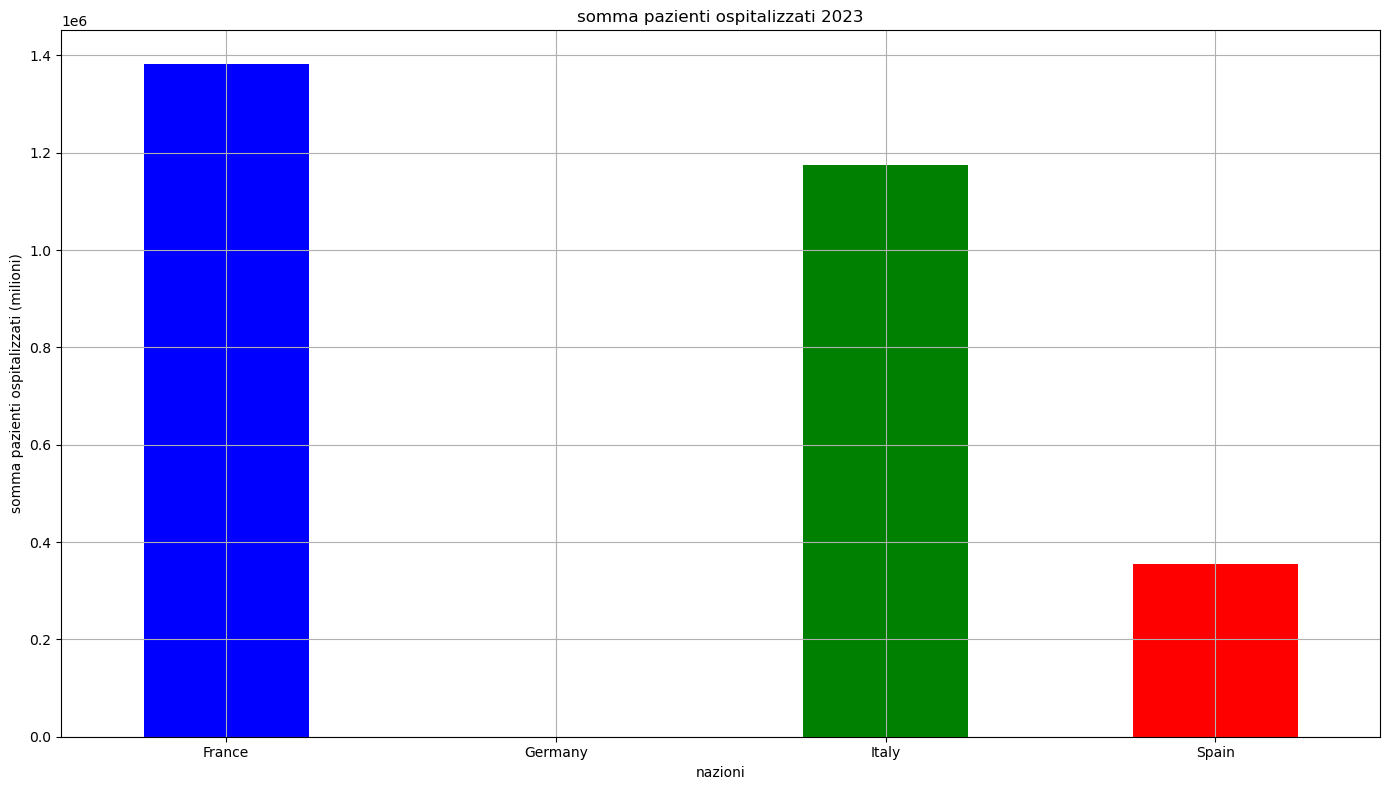

In [48]:
#creazione del grafico 
math.figure(figsize=(14, 8))
pazienti_ospedalizzati.plot(kind='bar', color=['blue','yellow','green','red'])
math.title('somma pazienti ospitalizzati 2023')
math.xlabel('nazioni')
math.ylabel('somma pazienti ospitalizzati (milioni)')
math.grid(True)
math.xticks(rotation=0)
math.tight_layout()
math.show()

Commento: non esiste una procedura univoca per la sostituzione dei dati nulli, bisogna valutare di caso in caso come approcciarsi, considerando anche che impatto la loro sostituzione o rimozione dal dataframe possa avere sul processo di analisi, di norma e' meglio non sostituire ma creare nuove variabili e filtrare durante l'analisi.